Importação das dependendências

In [2]:
import io

import numpy as np
import pandas as pd

import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as ps
import seaborn as sns
from tensorflow import keras

In [3]:
chicago_taxi_dataset = pd.read_csv('chicago_taxi_train.csv')

Fragmentando um pouco o dataset, pegando as partes mais importantes

In [4]:
training_df = chicago_taxi_dataset[['TRIP_SECONDS', 'TRIP_MILES', 'FARE', 'COMPANY', 'TIP_RATE', 'PAYMENT_TYPE']]

print('Read dataset successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset successfully.
Total number of rows: 31694




,TRIP_SECONDS,TRIP_MILES,FARE,COMPANY,TIP_RATE,PAYMENT_TYPE
0,2341,2.57,31.99,Flash Cab,6.3,Mobile
1,1074,1.18,9.75,Flash Cab,27.9,Credit Card
2,1173,1.29,10.25,Sun Taxi,0.0,Cash
3,3360,3.70,23.75,Choice Taxi Association,0.0,Cash
4,1044,1.15,10.00,Flash Cab,0.0,Cash
...,...,...,...,...,...,...
195,821,1.13,9.00,Blue Ribbon Taxi Association,22.9,Mobile
196,414,0.57,6.00,Flash Cab,0.0,Cash
197,886,1.22,9.00,City Service,0.0,Cash
198,1219,1.68,9.00,Sun Taxi,23.0,Mobile


In [5]:
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_SECONDS,TRIP_MILES,FARE,COMPANY,TIP_RATE,PAYMENT_TYPE
count,31694.000000,31694.000000,31694.000000,31694,31694.000000,31694
unique,NaN,NaN,NaN,31,NaN,7
top,NaN,NaN,NaN,Flash Cab,NaN,Credit Card
freq,NaN,NaN,NaN,7887,NaN,14142
mean,1319.796397,8.289463,23.905210,NaN,12.965785,NaN
std,928.932873,7.265672,16.970022,NaN,15.517765,NaN
min,60.000000,0.500000,3.250000,NaN,0.000000,NaN
25%,548.000000,1.720000,9.000000,NaN,0.000000,NaN
50%,1081.000000,5.920000,18.750000,NaN,12.200000,NaN
75%,1888.000000,14.500000,38.750000,NaN,20.800000,NaN


In [6]:
answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# Qual é a tarifa máxima?

max_fare = training_df['FARE'].max()
print("What is the maximum fare? \t\t\t\tAnswer: ${fare:.2f}".format(fare = max_fare))

# Qual a distância média em todas as viagens?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? \t\tAnswer: {mean:.4f} miles".format(mean = mean_distance))

# Quantas empresas de táxi estão no conjunto de dados?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? \t\tAnswer: {number}".format(number = num_unique_companies))

# Qual é a forma de pagamento mais frequente?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? \t\tAnswer: {type}".format(type = most_freq_payment_type))

# Existem recursos ausentes de dados?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


Gerar uma Matriz de Correlação

Em Machine Learning, é essencial identificar quais características estão correlacionadas ao rótulo. Por exemplo, na tarifa de táxi, distância percorrida e duração da viagem são fatores intuitivamente associados ao valor final. Usando uma matriz de correlação, você pode quantificar essas relações:

1.0: Correlação positiva perfeita (ambos aumentam).
-1.0: Correlação negativa perfeita (um aumenta, o outro diminui).
0.0: Sem correlação linear.

Quanto maior o valor absoluto da correlação, maior o poder preditivo da característica.

In [7]:
training_df.corr(numeric_only=True)

,TRIP_SECONDS,TRIP_MILES,FARE,TIP_RATE
TRIP_SECONDS,1.000000,0.800855,0.830292,-0.084294
TRIP_MILES,0.800855,1.000000,0.975344,-0.049594
FARE,0.830292,0.975344,1.000000,-0.070979
TIP_RATE,-0.084294,-0.049594,-0.070979,1.000000


In [8]:
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


Visualizar Relações no Conjunto de Dados

Às vezes, é útil visualizar as relações entre as características de um conjunto de dados. Uma forma de fazer isso é utilizando um pair plot. Esse tipo de gráfico cria uma grade de gráficos pareados, permitindo observar a relação de cada característica com todas as outras em um único lugar.

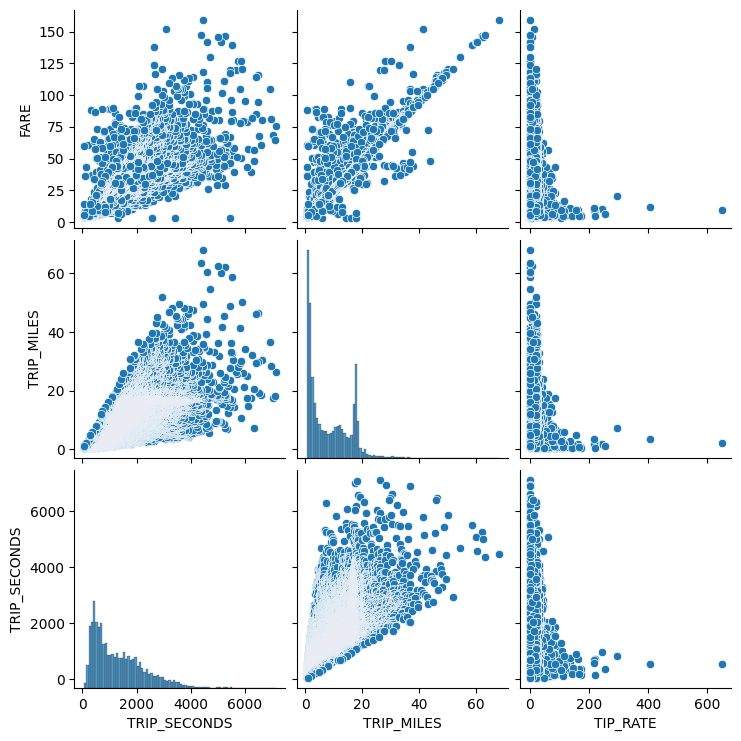

In [9]:
sns.pairplot(training_df, x_vars=['TRIP_SECONDS', 'TRIP_MILES', 'TIP_RATE'], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

Agora é a etapa de treinamento do modelo

Definindo funções de plotagem

In [5]:
def make_plots(df, feature_names, label_name, model_output, sample_size=200):
    
    random_sample = df.sample(n=sample_size).copy()
    random_sample.reset_index()
    weights, bias, epochs, rmse = model_output
    
    is_2d_plot = len(feature_names) == 1
    model_plot_type = "scatter" if is_2d_plot else "surface"
    fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])
    plot_data(random_sample, feature_names, label_name, fig)
    plot_model(random_sample, feature_names, label_name, weights, bias, fig)
    plot_loss_curve(epochs, rmse, fig)
    
    fig.show()
    return

def plot_loss_curve(epochs, rmse, fig):
    curve = px.line(x=epochs, y=rmse)
    curve.update_traces(line_color='#ff0000', line_width=2)
    
    fig.append_trace(curve.data[0],row=1, col=1)
    fig.update_xaxes(title_text="Epochs", row=1, col=1)
    fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])
    
    return

def plot_data(df, features, label, fig):
    if len(features) == 1:
        scatter = px.scatter(df, x=features[0], y=label)
    else:
        scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)
        
    fig.append_trace(scatter.data[0], row=1, col=2)
    if len(features) == 1:
        fig.update_xaxes(title_text=features[0], row=1, col=2)
        fig.update_yaxes(title_text=label, row=1, col=2)
    else:
        fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))
        
    return

def plot_model(df, features, bias, weights, fig):
    df['FARE_PREDICTED'] = bias[0]
    
    for index, feature in enumerate(features):
        df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]
        
    if len(features) == 1:
        model = px.line(df, x=features[0], y='FARE_PREDICTED')
        model.update_traces(line_color='#ff0000', line_width=2)
    else:
        z_name, y_name = "FARE_PREDICTED", features[1]
        z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
        y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
        x = []
        for i in range(len(y)):
            x.append((z[i]- weights[1][0] * y[i] - bias[0]) / weights[0][0])
            
        plane = pd.DataFrame({'x':x, 'y': y, 'z':[z] * 3})
        
        light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
        model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                          colorscale=light_yellow))

        fig.add_trace(model.data[0], row=1, col=2)
        
        return